In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset from UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
column_names = [f'A{i}' for i in range(1, 17)]
df = pd.read_csv(url, header=None, names=column_names)

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Encode the target variable: '+' as 1, '-' as 0
df['A16'] = df['A16'].map({'+': 1, '-': 0})

# Drop rows with missing target values
df.dropna(subset=['A16'], inplace=True)

# Separate features and target
X = df.drop('A16', axis=1)
y = df['A16'].astype(int)


In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Encode categorical variables
X_encoded = X.copy()
le = LabelEncoder()
for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

# Convert numerical columns to numeric and handle missing values
X_encoded[numerical_cols] = X_encoded[numerical_cols].apply(pd.to_numeric)
X_encoded.fillna(X_encoded.mean(), inplace=True)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


Decision Tree Accuracy: 0.782608695652174

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.79        68
           1       0.80      0.76      0.78        70

    accuracy                           0.78       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.78      0.78      0.78       138



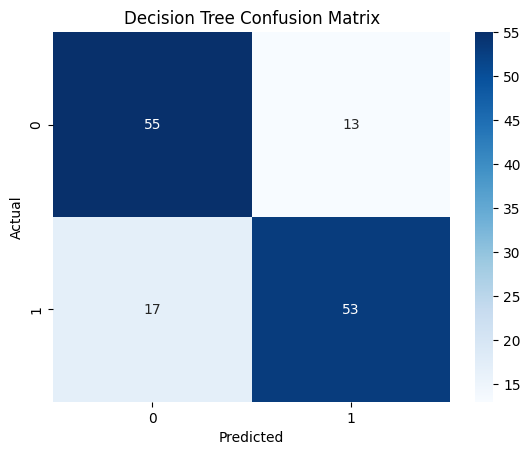

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Random Forest Accuracy: 0.8768115942028986

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88        68
           1       0.92      0.83      0.87        70

    accuracy                           0.88       138
   macro avg       0.88      0.88      0.88       138
weighted avg       0.88      0.88      0.88       138



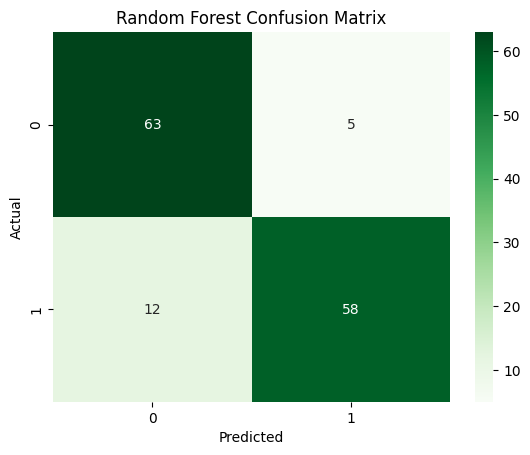

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


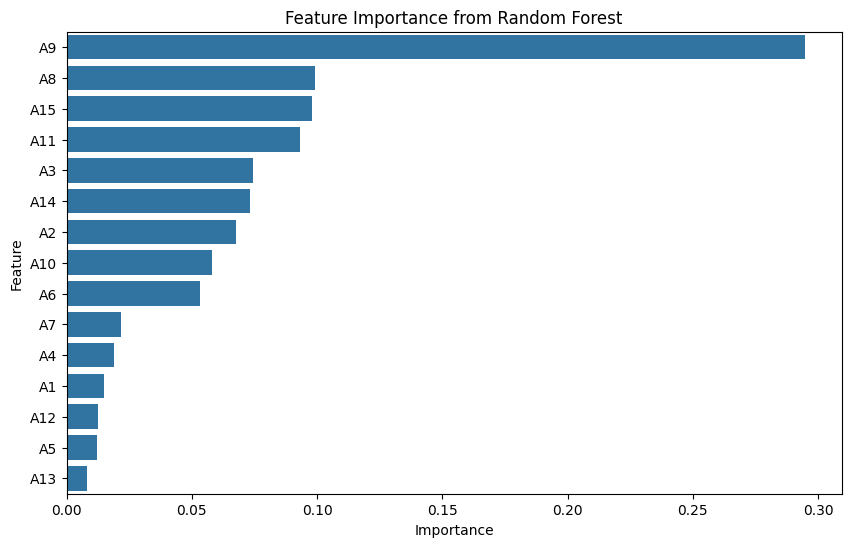

In [5]:
# Feature importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X_encoded.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()


Random Forest achieved higher precision and recall for both classes, meaning it was more effective at:

Correctly identifying both approved and non-approved credit applications.

Minimizing both false positives and false negatives.

 Model Stability
Decision Tree shows a slight imbalance in recall between the two classes, indicating it may overfit to patterns in training data.

Random Forest improves stability and consistency across classes by aggregating multiple trees, which reduces variance.

Use Case Suitability
If high accuracy and robustness are needed (e.g., for real-world deployment), Random Forest is clearly the better choice.

Decision Tree can still be useful for interpretability and quick prototyping, but may require pruning or tuning for better performance.


Based on the results, Random Forest is the recommended model for the Credit Approval prediction task, offering a better balance of precision, recall, and overall performance.
